# Ministry of Labor and Employment Promotion 
https://www.datosabiertos.gob.pe/group/ministerio-de-trabajo-y-promoci%C3%B3n-del-empleo

## Monthly average of Private sector Workers by Pension Scheme, according to districts - 2021 [MTPE] 
https://www.datosabiertos.gob.pe/dataset/promedio-mensual-de-trabajadores-del-sector-privado-por-r%C3%A9gimen-de-pensiones-seg%C3%BAn-distritos

### Dataset Description:
Monthly average of Private Sector Workers by Pension Regime, according to districts in 2021. This dataset presents: District ubigeo code, Type of Pension Regime where the worker is located.

**Note:**

Private Pension System (SPP) - It is regulated and supervised by the Superintendency of Banking, Insurance and AFP, which aims to preserve the interests of SPP members.   
    
    SPP INTEGRA: Integra Private Pension Fund
    SPP HORIZONTE: Horizonte Private Pension Fund
    SPP PROFUTURO: Profuturo Private Pension Fund
    SPP PRIMA: Prima Private Pension Fund
    SPP HABITAT: Habitat Private Pension Fund
    
These are the names of the five private pension fund administrators (AFPs) operating in Peru. Each AFP manages its own investment portfolio and offers different investment options to its members.

Therefore, these columns represent the average number of private sector workers in each district who are affiliated with their respective private pension fund (AFP).

## Objective:

To gain insights into the monthly average of private sector workers in Lima, categorized by different pension regimes and distributed across districts. By understanding the distribution of workers among various pension schemes, I aim to identify patterns, trends, and potential areas for improvement in Lima's workforce management and economic development.


# 1. Data Preprocessing
- Loaded the dataset and selected the required columns.
- Renamed columns for better readability.
- Converted date columns to the appropriate format.
- Checked for null and duplicate values (none found).

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [98]:
data = pd.read_csv('Monthly average of Private sector Workers by Pension Scheme.csv')

In [99]:
data.head()

,FECHA_CORTE,CODIGO_UBIGEO,DISTRITOS,DECRETO_LEY_19990_SISTEMA_NACIONAL_DE_PENSIONES_ONP,DECRETO_LEY_20530,CAJA_DE_BENEFICIOS_DE_SEGURIDAD_SOCIAL_DEL_PESCADOR,CAJA_DE_PENSIONES_MILITAR,CAJA_DE_PENSIONES_POLICIAL,LEY_29903_SISTEMA_NACIONAL_DE_PENSIONES_INDEPENDIENTES,LEY_30003_RÉGIMEN_ESPECIAL_DE_PENSIONES_PESQUEROS,SPP_INTEGRA,SPP_HORIZONTE,SPP_PROFUTURO,SPP_PRIMA,SPP_HABITAT,PENDIENTE_DE_ELECCIÓN_DE_REGIMEN_PENSIONARIO,SIN_REGIMEN_PENSIONARIO_NO_APLICA,NO_DETERMINADO
0,20230404,10101,CHACHAPOYAS,1143,3,0,0,0,0,0,936,16,255,345,186,0,321,0
1,20230404,10103,BALSAS,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0
2,20230404,10107,GRANADA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20230404,10108,HUANCAS,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,20230404,10109,LA JALCA,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [100]:
data.shape

(1553, 18)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   FECHA_CORTE                                             1553 non-null   int64 
 1   CODIGO_UBIGEO                                           1553 non-null   int64 
 2   DISTRITOS                                               1549 non-null   object
 3   DECRETO_LEY_19990_SISTEMA_NACIONAL_DE_PENSIONES_ONP     1553 non-null   int64 
 4   DECRETO_LEY_20530                                       1553 non-null   int64 
 5   CAJA_DE_BENEFICIOS_DE_SEGURIDAD_SOCIAL_DEL_PESCADOR     1553 non-null   int64 
 6   CAJA_DE_PENSIONES_MILITAR                               1553 non-null   int64 
 7   CAJA_DE_PENSIONES_POLICIAL                              1553 non-null   int64 
 8   LEY_29903_SISTEMA_NACIONAL_DE_PENSIONES_INDEPEND

In [102]:
data.columns

Index(['FECHA_CORTE', 'CODIGO_UBIGEO', 'DISTRITOS',
       'DECRETO_LEY_19990_SISTEMA_NACIONAL_DE_PENSIONES_ONP',
       'DECRETO_LEY_20530 ',
       'CAJA_DE_BENEFICIOS_DE_SEGURIDAD_SOCIAL_DEL_PESCADOR',
       'CAJA_DE_PENSIONES_MILITAR ', 'CAJA_DE_PENSIONES_POLICIAL',
       'LEY_29903_SISTEMA_NACIONAL_DE_PENSIONES_INDEPENDIENTES',
       'LEY_30003_RÉGIMEN_ESPECIAL_DE_PENSIONES_PESQUEROS', 'SPP_INTEGRA',
       'SPP_HORIZONTE', 'SPP_PROFUTURO', 'SPP_PRIMA', 'SPP_HABITAT',
       'PENDIENTE_DE_ELECCIÓN_DE_REGIMEN_PENSIONARIO',
       'SIN_REGIMEN_PENSIONARIO_NO_APLICA', 'NO_DETERMINADO'],
      dtype='object')

In [103]:
data.isnull().sum()

FECHA_CORTE                                               0
CODIGO_UBIGEO                                             0
DISTRITOS                                                 4
DECRETO_LEY_19990_SISTEMA_NACIONAL_DE_PENSIONES_ONP       0
DECRETO_LEY_20530                                         0
CAJA_DE_BENEFICIOS_DE_SEGURIDAD_SOCIAL_DEL_PESCADOR       0
CAJA_DE_PENSIONES_MILITAR                                 0
CAJA_DE_PENSIONES_POLICIAL                                0
LEY_29903_SISTEMA_NACIONAL_DE_PENSIONES_INDEPENDIENTES    0
LEY_30003_RÉGIMEN_ESPECIAL_DE_PENSIONES_PESQUEROS         0
SPP_INTEGRA                                               0
SPP_HORIZONTE                                             0
SPP_PROFUTURO                                             0
SPP_PRIMA                                                 0
SPP_HABITAT                                               0
PENDIENTE_DE_ELECCIÓN_DE_REGIMEN_PENSIONARIO              0
SIN_REGIMEN_PENSIONARIO_NO_APLICA       

In [104]:
data.duplicated().sum()

0

In [105]:
data.dropna(inplace=True)

In [106]:
# Map Spanish column names to English
column_mapping = {
    'FECHA_CORTE': 'CUT_DATE',
    'CODIGO_UBIGEO': 'UBIGEO_CODE',
    'DISTRITOS': 'DISTRICTS',
    'DECRETO_LEY_19990_SISTEMA_NACIONAL_DE_PENSIONES_ONP': 'DECREE_LAW_19990_NATIONAL_ONP_PENSION_SYSTEM',
    'DECRETO_LEY_20530': 'DECREE_LAW_20530',
    'CAJA_DE_BENEFICIOS_DE_SEGURIDAD_SOCIAL_DEL_PESCADOR': 'FISHERMEN_SOCIAL_SECURITY_BENEFITS_FUND',
    'CAJA_DE_PENSIONES_MILITAR ': 'MILITARY_PENSION_FUND',
    'CAJA_DE_PENSIONES_POLICIAL': 'POLICE_PENSION_FUND',
    'LEY_29903_SISTEMA_NACIONAL_DE_PENSIONES_INDEPENDIENTES': 'LAW_29903_NATIONAL_SYSTEM_OF_INDEPENDENT_PENSIONS',
    'LEY_30003_RÉGIMEN_ESPECIAL_DE_PENSIONES_PESQUEROS': 'LAW_30003_SPECIAL_PENSIONS_SCHEME_FOR_FISHERMEN',
    'SPP_INTEGRA': 'SPP_INTEGRA',
    'SPP_HORIZONTE': 'SPP_HORIZONTE',
    'SPP_PROFUTURO': 'SPP_PROFUTURO',
    'SPP_PRIMA': 'SPP_PRIMA',
    'SPP_HABITAT': 'SPP_HABITAT',
    'PENDIENTE_DE_ELECCIÓN_DE_REGIMEN_PENSIONARIO': 'PENDING_CHOICE_OF_PENSION_PLAN',
    'SIN_REGIMEN_PENSIONARIO_NO_APLICA': 'NO_PENSION_PLAN_DOES_NOT_APPLY',
    'NO_DETERMINADO': 'NOT_DETERMINED'
}

# Rename columns in the DataFrame
data.rename(columns=column_mapping, inplace=True)

# Display the updated DataFrame
data.head()


,CUT_DATE,UBIGEO_CODE,DISTRICTS,DECREE_LAW_19990_NATIONAL_ONP_PENSION_SYSTEM,DECRETO_LEY_20530,FISHERMEN_SOCIAL_SECURITY_BENEFITS_FUND,MILITARY_PENSION_FUND,POLICE_PENSION_FUND,LAW_29903_NATIONAL_SYSTEM_OF_INDEPENDENT_PENSIONS,LAW_30003_SPECIAL_PENSIONS_SCHEME_FOR_FISHERMEN,SPP_INTEGRA,SPP_HORIZONTE,SPP_PROFUTURO,SPP_PRIMA,SPP_HABITAT,PENDING_CHOICE_OF_PENSION_PLAN,NO_PENSION_PLAN_DOES_NOT_APPLY,NOT_DETERMINED
0,20230404,10101,CHACHAPOYAS,1143,3,0,0,0,0,0,936,16,255,345,186,0,321,0
1,20230404,10103,BALSAS,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0
2,20230404,10107,GRANADA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20230404,10108,HUANCAS,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,20230404,10109,LA JALCA,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [107]:
data.columns

Index(['CUT_DATE', 'UBIGEO_CODE', 'DISTRICTS',
       'DECREE_LAW_19990_NATIONAL_ONP_PENSION_SYSTEM', 'DECRETO_LEY_20530 ',
       'FISHERMEN_SOCIAL_SECURITY_BENEFITS_FUND', 'MILITARY_PENSION_FUND',
       'POLICE_PENSION_FUND',
       'LAW_29903_NATIONAL_SYSTEM_OF_INDEPENDENT_PENSIONS',
       'LAW_30003_SPECIAL_PENSIONS_SCHEME_FOR_FISHERMEN', 'SPP_INTEGRA',
       'SPP_HORIZONTE', 'SPP_PROFUTURO', 'SPP_PRIMA', 'SPP_HABITAT',
       'PENDING_CHOICE_OF_PENSION_PLAN', 'NO_PENSION_PLAN_DOES_NOT_APPLY',
       'NOT_DETERMINED'],
      dtype='object')

In [108]:
# Dropping column 
data.drop('CUT_DATE', axis=1, inplace=True)

In [109]:
data.dtypes

UBIGEO_CODE                                           int64
DISTRICTS                                            object
DECREE_LAW_19990_NATIONAL_ONP_PENSION_SYSTEM          int64
DECRETO_LEY_20530                                     int64
FISHERMEN_SOCIAL_SECURITY_BENEFITS_FUND               int64
MILITARY_PENSION_FUND                                 int64
POLICE_PENSION_FUND                                   int64
LAW_29903_NATIONAL_SYSTEM_OF_INDEPENDENT_PENSIONS     int64
LAW_30003_SPECIAL_PENSIONS_SCHEME_FOR_FISHERMEN       int64
SPP_INTEGRA                                           int64
SPP_HORIZONTE                                         int64
SPP_PROFUTURO                                         int64
SPP_PRIMA                                             int64
SPP_HABITAT                                           int64
PENDING_CHOICE_OF_PENSION_PLAN                        int64
NO_PENSION_PLAN_DOES_NOT_APPLY                        int64
NOT_DETERMINED                          

In [110]:
data.UBIGEO_CODE.nunique()

1549

In [111]:
data.DISTRICTS.nunique()

1437

In [112]:
# List of district names in Lima
lima_districts = ['LIMA', 'ANCON', 'ATE', 'BARRANCO', 'BREÑA', 'CARABAYLLO', 'CHACLACAYO', 'CHORRILLOS', 'CIENEGUILLA', 'COMAS',
                  'EL AGUSTINO', 'INDEPENDENCIA', 'JESUS MARIA', 'LA MOLINA', 'LA VICTORIA', 'LINCE', 'LOS OLIVOS', 'LURIGANCHO-CHOSICA',
                  'LURIN', 'MAGDALENA DEL MAR', 'PUEBLO LIBRE', 'MIRAFLORES', 'PACHACAMAC', 'PUCUSANA', 'PUENTE PIEDRA', 'PUNTA HERMOSA',
                  'PUNTA NEGRA', 'RÍMAC', 'SAN BARTOLO', 'SAN BORJA', 'SAN ISIDRO', 'SAN JUAN DE LURIGANCHO', 'SAN JUAN DE MIRAFLORES',
                  'SAN LUIS', 'SAN MARTÍN DE PORRES', 'SAN MIGUEL', 'SANTA ANITA', 'SANTA MARÍA DEL MAR', 'SANTA ROSA', 'SANTIAGO DE SURCO',
                  'SURQUILLO', 'VILLA EL SALVADOR', 'VILLA MARÍA DEL TRIUNFO']


# Filter rows based on Lima districts
df = data[data['DISTRICTS'].isin(lima_districts)]

# Display the filtered DataFrame
df.head()

,UBIGEO_CODE,DISTRICTS,DECREE_LAW_19990_NATIONAL_ONP_PENSION_SYSTEM,DECRETO_LEY_20530,FISHERMEN_SOCIAL_SECURITY_BENEFITS_FUND,MILITARY_PENSION_FUND,POLICE_PENSION_FUND,LAW_29903_NATIONAL_SYSTEM_OF_INDEPENDENT_PENSIONS,LAW_30003_SPECIAL_PENSIONS_SCHEME_FOR_FISHERMEN,SPP_INTEGRA,SPP_HORIZONTE,SPP_PROFUTURO,SPP_PRIMA,SPP_HABITAT,PENDING_CHOICE_OF_PENSION_PLAN,NO_PENSION_PLAN_DOES_NOT_APPLY,NOT_DETERMINED
45,10610,SANTA ROSA,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
58,20105,INDEPENDENCIA,1769,4,0,0,0,0,0,1172,26,582,690,312,1,157,0
93,20701,SAN LUIS,75,0,0,0,0,0,0,23,0,10,6,7,0,6,0
152,21510,SANTA ROSA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259,40110,MIRAFLORES,2325,2,0,0,0,0,0,1065,31,433,754,373,2,342,0


In [113]:
df['DISTRICTS'].isin(lima_districts).sum()

56

In [114]:
df.shape

(56, 17)

In [115]:
df.DISTRICTS.nunique()

38

# 2. Exploratory Data Analysis

## Pension Scheme Distribution Analysis:

The most subscribed pension scheme is: SPP_INTEGRA
The least subscribed pension scheme is: SPP_HORIZONTE


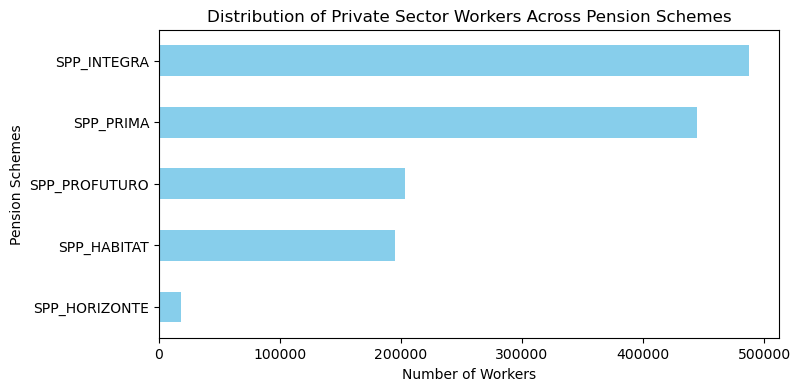

In [119]:
# Identify the most and least subscribed pension schemes
pension_columns = ['SPP_INTEGRA', 'SPP_HORIZONTE', 'SPP_PROFUTURO', 'SPP_PRIMA', 'SPP_HABITAT']
pension_distribution = df[pension_columns]

# Sum the number of workers for each pension scheme
pension_distribution_totals = pension_distribution.sum()

# Identify the most and least subscribed pension schemes
most_subscribed = pension_distribution_totals.idxmax()
least_subscribed = pension_distribution_totals.idxmin()

print(f"The most subscribed pension scheme is: {most_subscribed}")
print(f"The least subscribed pension scheme is: {least_subscribed}")

# Plot the distribution
plt.figure(figsize=(8, 4))
pension_distribution_totals.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Private Sector Workers Across Pension Schemes')
plt.xlabel('Number of Workers')
plt.ylabel('Pension Schemes')
plt.show()

In [167]:
# Select the relevant columns for analysis
pension_funds = df[['DECRETO_LEY_20530 ','DECREE_LAW_19990_NATIONAL_ONP_PENSION_SYSTEM','FISHERMEN_SOCIAL_SECURITY_BENEFITS_FUND', 'MILITARY_PENSION_FUND',
                    'POLICE_PENSION_FUND', 'LAW_29903_NATIONAL_SYSTEM_OF_INDEPENDENT_PENSIONS',
                    'LAW_30003_SPECIAL_PENSIONS_SCHEME_FOR_FISHERMEN']]

# Sum the counts of workers in each pension fund
pension_fund_summary = pension_funds.sum()

pension_fund_summary

DECRETO_LEY_20530                                       112
DECREE_LAW_19990_NATIONAL_ONP_PENSION_SYSTEM         423135
FISHERMEN_SOCIAL_SECURITY_BENEFITS_FUND                   0
MILITARY_PENSION_FUND                                    22
POLICE_PENSION_FUND                                      10
LAW_29903_NATIONAL_SYSTEM_OF_INDEPENDENT_PENSIONS         0
LAW_30003_SPECIAL_PENSIONS_SCHEME_FOR_FISHERMEN         961
dtype: int64

## District-wise Workforce Assessment:

C:\Users\l\AppData\Local\Temp\ipykernel_24404\3636326693.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Workers'] = df[pension_scheme_columns].sum(axis=1)


The district with the highest workforce participation is: SAN BARTOLO
The district with the lowest workforce participation is: SAN ISIDRO


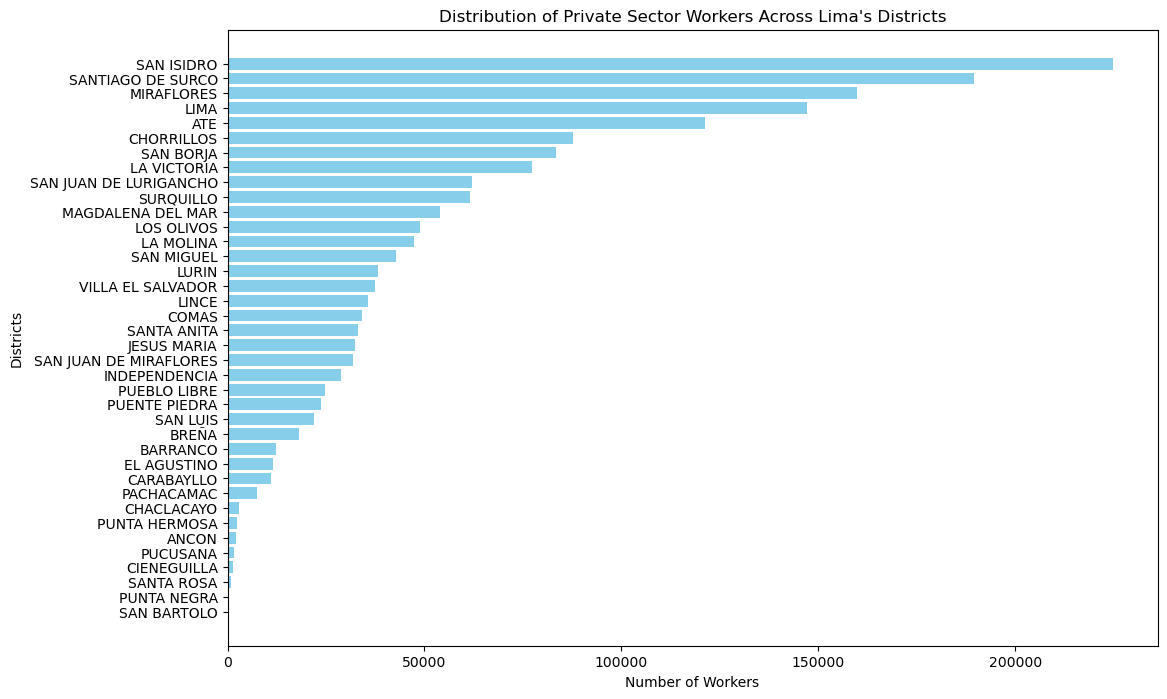

In [125]:
# Identify districts with high and low workforce participation

# List of columns related to different pension schemes
pension_scheme_columns = ['DECREE_LAW_19990_NATIONAL_ONP_PENSION_SYSTEM', 'DECRETO_LEY_20530 ',
                           'FISHERMEN_SOCIAL_SECURITY_BENEFITS_FUND', 'MILITARY_PENSION_FUND',
                           'POLICE_PENSION_FUND', 'LAW_29903_NATIONAL_SYSTEM_OF_INDEPENDENT_PENSIONS',
                           'LAW_30003_SPECIAL_PENSIONS_SCHEME_FOR_FISHERMEN', 'SPP_INTEGRA', 'SPP_HORIZONTE',
                           'SPP_PROFUTURO', 'SPP_PRIMA', 'SPP_HABITAT', 'PENDING_CHOICE_OF_PENSION_PLAN',
                           'NO_PENSION_PLAN_DOES_NOT_APPLY', 'NOT_DETERMINED']

# Sum the values across pension scheme columns to get the total number of workers
df['Total_Workers'] = df[pension_scheme_columns].sum(axis=1)

# Group the data by districts and calculate the total number of workers in each district
district_workforce = df.groupby('DISTRICTS')['Total_Workers'].sum().reset_index()

# Sort the districts based on the total number of workers
district_workforce_sorted = district_workforce.sort_values(by='Total_Workers', ascending=True)

high_participation_district = district_workforce_sorted['DISTRICTS'].iloc[0]
low_participation_district = district_workforce_sorted['DISTRICTS'].iloc[-1]

print(f"The district with the highest workforce participation is: {high_participation_district}")
print(f"The district with the lowest workforce participation is: {low_participation_district}")

# Plot the distribution of private sector workers across districts
plt.figure(figsize=(12, 8))
plt.barh(district_workforce_sorted['DISTRICTS'], district_workforce_sorted['Total_Workers'], color='skyblue')
plt.title('Distribution of Private Sector Workers Across Lima\'s Districts')
plt.xlabel('Number of Workers')
plt.ylabel('Districts')
plt.show()


## Pension Scheme Comparison:

C:\Users\l\AppData\Local\Temp\ipykernel_24404\1239440615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Enrollment'] = df[pension_fund_columns].sum(axis=1)


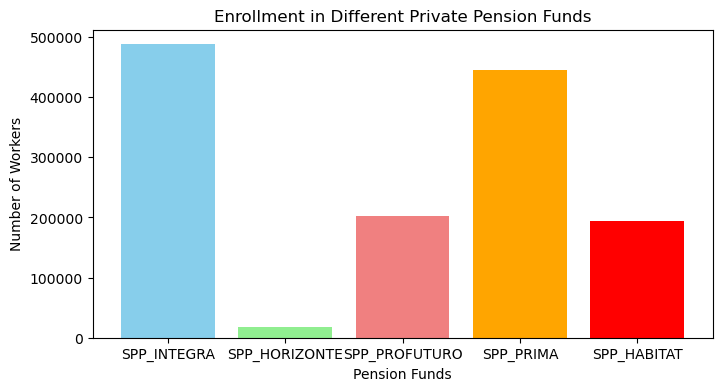

The most popular pension fund is: SPP_INTEGRA
The least popular pension fund is: SPP_HORIZONTE


In [134]:
# Identify trends in the choice of pension schemes among private sector workers

# List of columns related to different private pension funds
pension_fund_columns = ['SPP_INTEGRA', 'SPP_HORIZONTE', 'SPP_PROFUTURO', 'SPP_PRIMA', 'SPP_HABITAT']

# Calculate the total enrollment in each pension fund
df['Total_Enrollment'] = df[pension_fund_columns].sum(axis=1)

# Plot the enrollment in each pension fund
plt.figure(figsize=(8, 4))
plt.bar(pension_fund_columns, df[pension_fund_columns].sum(),  color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'red'])
plt.title('Enrollment in Different Private Pension Funds')
plt.xlabel('Pension Funds')
plt.ylabel('Number of Workers')
plt.show()

# Identify trends in the choice of pension schemes among private sector workers
popular_pension_fund = df[pension_fund_columns].sum().idxmax()
least_popular_pension_fund = df[pension_fund_columns].sum().idxmin()

print(f"The most popular pension fund is: {popular_pension_fund}")
print(f"The least popular pension fund is: {least_popular_pension_fund}")


## Pension Scheme Preferences in Specific Districts:

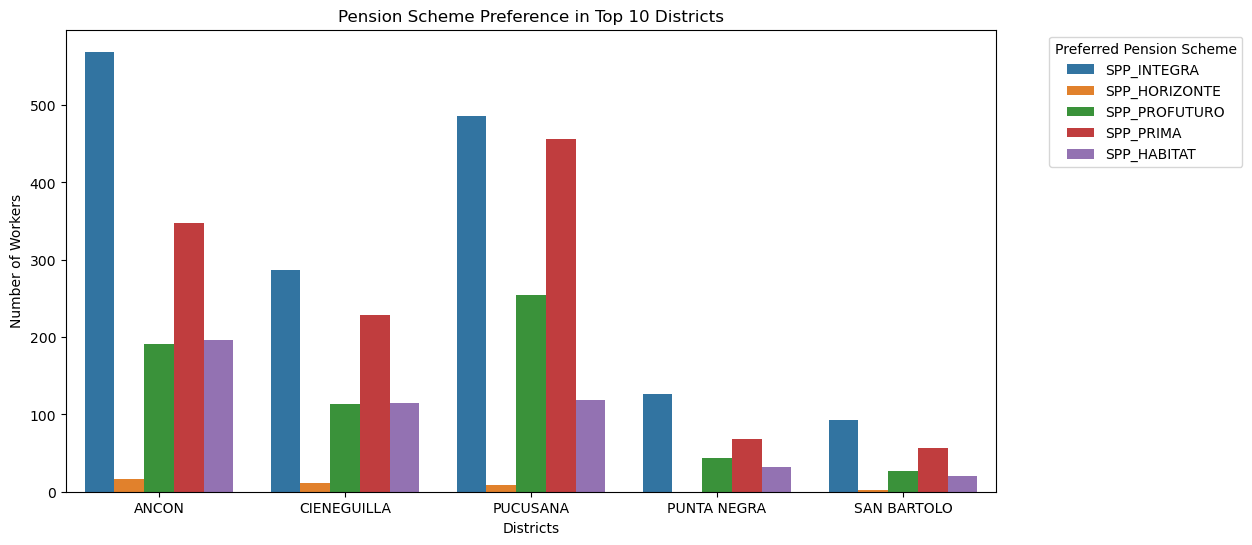

In [150]:
# Exploring if certain demographic groups prefer specific pension schemes

# Calculate the total number of workers in each district
district_worker_totals = df.groupby('DISTRICTS').sum().sum(axis=1).sort_values(ascending=True)

# Select the top 5 districts
top_5_districts = district_worker_totals.head(5).index

# Filter the dataframe for the top 10 districts
df_top_5 = df[df['DISTRICTS'].isin(top_5_districts)]

# Melt the dataframe for visualization
melted_df_top_5 = pd.melt(df_top_5, id_vars=['DISTRICTS'], value_vars=['SPP_INTEGRA', 'SPP_HORIZONTE', 'SPP_PROFUTURO', 'SPP_PRIMA', 'SPP_HABITAT'], 
                            var_name='Preferred_Pension_Scheme', value_name='Number_of_Workers')

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='DISTRICTS', y='Number_of_Workers', hue='Preferred_Pension_Scheme', data=melted_df_top_5)
plt.title('Pension Scheme Preference in Top 10 Districts')
plt.xlabel('Districts')
plt.ylabel('Number of Workers')
plt.legend(title='Preferred Pension Scheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


SPP_INTEGRA is preferred in various districts.

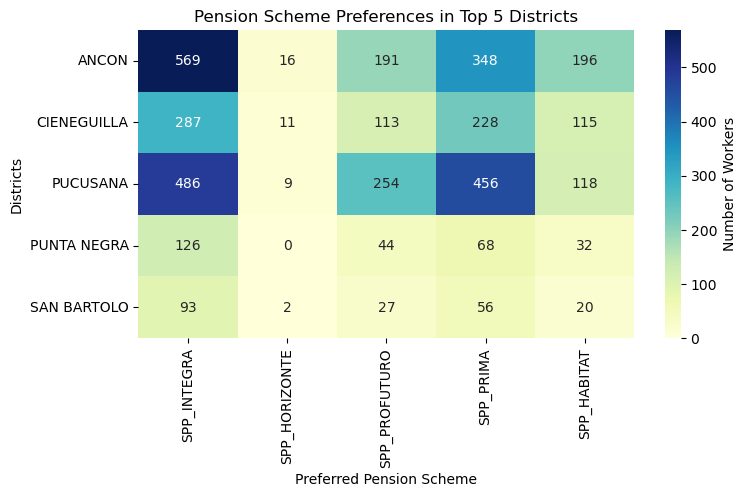

In [155]:
# Create a subset of the data for heatmap
heatmap_data = df_top_5[['DISTRICTS', 'SPP_INTEGRA', 'SPP_HORIZONTE', 'SPP_PROFUTURO', 'SPP_PRIMA', 'SPP_HABITAT']]

# Set 'DISTRICTS' as the index
heatmap_data.set_index('DISTRICTS', inplace=True)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Number of Workers'})
plt.title('Pension Scheme Preferences in Top 5 Districts')
plt.xlabel('Preferred Pension Scheme')
plt.ylabel('Districts')
plt.show()

## Comparison with National Pension Systems:

<Figure size 1200x800 with 0 Axes>

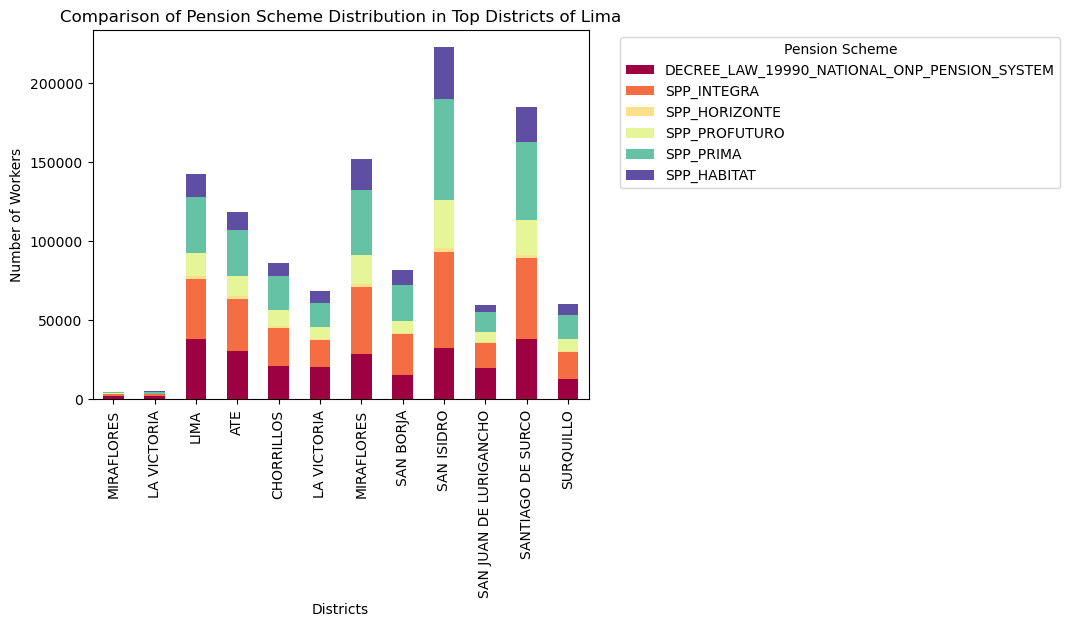

In [171]:
# Choosing the top 10 districts based on total workforce
top_districts = df.groupby('DISTRICTS')['Total_Workers'].sum().nlargest(10).index

# Create a subset of the data for the top districts
top_district_data = df[df['DISTRICTS'].isin(top_districts)]

# Set 'DISTRICTS' as the index
top_district_data.set_index('DISTRICTS', inplace=True)

# Plot the bar plot for the top districts
plt.figure(figsize=(12, 8))
top_district_data[['DECREE_LAW_19990_NATIONAL_ONP_PENSION_SYSTEM', 'SPP_INTEGRA', 'SPP_HORIZONTE', 'SPP_PROFUTURO', 'SPP_PRIMA', 'SPP_HABITAT']].plot(kind='bar', stacked=True, cmap='Spectral')
plt.title('Comparison of Pension Scheme Distribution in Top Districts of Lima')
plt.xlabel('Districts')
plt.ylabel('Number of Workers')
plt.legend(title='Pension Scheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

SPP Integra is the most popular pension scheme.
Public pension schemes are less common.
SPP Prima is the second most popular private pension scheme.

## Pension Scheme Participation vs. Employment Rates:

C:\Users\l\AppData\Local\Temp\ipykernel_24404\3948725917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall_Pension_Participation'] = df[pension_scheme_columns].sum(axis=1)
C:\Users\l\AppData\Local\Temp\ipykernel_24404\3948725917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Employment_Rate'] = (df['Total_Workers'] / df['Total_Workers'].sum()) * 100


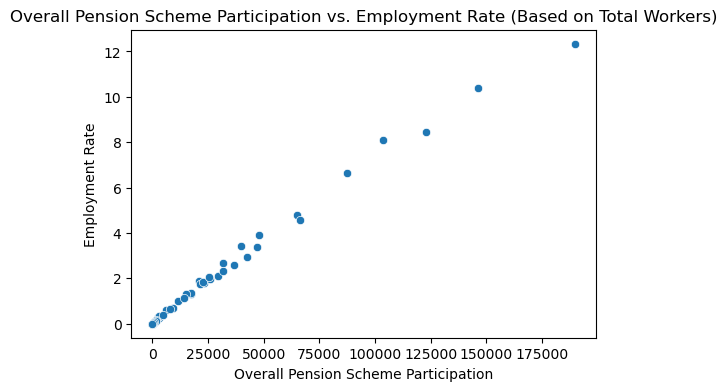

In [180]:
# Investigate the relationship between pension scheme participation and employment rates:

pension_scheme_columns = ['SPP_INTEGRA', 'SPP_HORIZONTE', 'SPP_PROFUTURO', 'SPP_PRIMA', 'SPP_HABITAT']

# Sum the values across pension scheme columns to get overall participation
df['Overall_Pension_Participation'] = df[pension_scheme_columns].sum(axis=1)

df['Employment_Rate'] = (df['Total_Workers'] / df['Total_Workers'].sum()) * 100

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Overall_Pension_Participation', y='Employment_Rate', data=df)
plt.title('Overall Pension Scheme Participation vs. Employment Rate (Based on Total Workers)')
plt.xlabel('Overall Pension Scheme Participation')
plt.ylabel('Employment Rate')
plt.show()

Positive correlation with a non-linear relationship.

In [181]:
# Calculate correlation coefficient
correlation_coefficient = df['Overall_Pension_Participation'].corr(df['Employment_Rate'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.9963662762669586


Correlation coefficient is high (0.996), indicating a strong positive correlation.


In [185]:
# Identify Districts with Deviations:
threshold = 100000
deviating_districts = df[abs(df['Overall_Pension_Participation'] - df['Employment_Rate']) > threshold]

# visualize the deviating districts
print(deviating_districts[['DISTRICTS', 'Overall_Pension_Participation', 'Employment_Rate']])

              DISTRICTS  Overall_Pension_Participation  Employment_Rate
1043               LIMA                         103729         8.078581
1064         MIRAFLORES                         122845         8.472188
1073         SAN ISIDRO                         189945        12.341076
1082  SANTIAGO DE SURCO                         146508        10.400430


# 3. Recommendations and Actionable Insights

1. **Promotion of SPP_INTEGRA:**
   - Given that SPP_INTEGRA is the most popular pension scheme, initiatives could be undertaken to promote awareness and benefits associated with this scheme.
   - Collaborate with employers and organizations to encourage enrollment in SPP_INTEGRA, highlighting its advantages.

2. **Targeted Interventions in Low-Participation Districts:**
   - For districts with low workforce participation and pension scheme enrollment (e.g., SAN BARTOLO), consider targeted interventions.
   - Engage with local communities to understand barriers to participation and design outreach programs to address concerns.

3. **Demographic Preferences:**
   - Explore and understand the reasons behind demographic groups preferring specific pension schemes in certain districts.
   - Tailor communication and outreach strategies to resonate with the preferences and needs of these groups.

4. **Public Pension Scheme Promotion:**
   - Since public pension schemes have lower participation, efforts can be made to raise awareness about their benefits.
   - Collaborate with government agencies to promote public pension schemes and ensure workers are informed about all available options.

5. **Employment Rates and Pension Scheme Participation:**
   - Continue monitoring the positive correlation between employment rates and pension scheme participation.
   - Explore the potential outliers and deviations in specific districts to understand the underlying factors contributing to the observed patterns.

6. **Educational Campaigns:**
   - Implement educational campaigns targeting both employers and employees about the importance of pension planning.
   - Provide resources and workshops to enhance financial literacy, helping workers make informed decisions about pension schemes.

7. **Industry-Specific Initiatives:**
   - Analyze industries with unique workforce and pension scheme patterns.
   - Develop industry-specific initiatives or incentives to encourage pension scheme enrollment based on the characteristics of each sector.

8. **Collaboration with Employers:**
   - Collaborate with employers to incorporate pension scheme information into employee onboarding processes.
   - Facilitate employer-led awareness programs to encourage active participation in pension schemes.

9. **Continuous Monitoring and Evaluation:**
   - Establish a framework for continuous monitoring and evaluation of pension scheme participation trends.
   - Regularly assess the impact of awareness campaigns and interventions to adapt strategies as needed.

10. **Data-Driven Decision-Making:**
       - Continue leveraging data to inform decision-making.
       - Explore additional datasets or sources to enhance the depth of analysis and uncover new insights.

By implementing these recommendations, stakeholders can work towards increasing pension scheme participation, improving financial security for workers, and contributing to the overall economic well-being of Lima.

### References: 
**Pension System in Peru** 

https://www.gob.pe/517-superintendencia-de-banca-seguros-y-administradoras-privadas-de-fondos-de-pensiones-sistema-privado-de-pensiones-spp

https://thedocs.worldbank.org/en/doc/702231530116860363-0160022017/original/GroupPresentationPeru.pdf